In [37]:
from pymongo import MongoClient
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline

In [111]:
client = MongoClient('mongodb://localhost:27017/')
db = client.routes
routes = db.routes
raw = routes.find()
df = pd.DataFrame(list(raw))
df_new = df.drop(['FA', '_id', 'average_rating', 'id', 'name', 'season', 'submitted_by', 'submitted_on', 'uiaa'], axis=1)
df_new.head(50)

,Aid,Alpine,Boulder,Ice,Mixed,Sport,TR,Trad,grade,height,original_grade,page_views,pitches
0,0,0,0,0,0,0,0,1,5.6,41.0,5.6,588,1.0
1,0,0,0,0,0,0,0,1,5.5,41.0,5.5,642,1.0
2,0,0,0,0,0,0,1,1,5.5,35.0,5.5,176,NaN
3,0,0,0,0,0,0,1,1,5.6,85.0,5.6,1263,1.0
4,0,0,0,0,0,0,1,1,5.6,30.0,5.6,678,1.0
5,0,0,0,0,0,1,0,0,5.7,40.0,5.7,326,NaN
6,0,0,0,0,0,0,1,1,5.7,95.0,5.7,454,1.0
7,0,0,0,0,0,1,0,0,5.5,95.0,5.5,18,NaN
8,0,0,0,0,0,0,0,1,5.7,NaN,5.7,51,NaN
9,0,0,0,0,0,1,0,0,5.3,75.0,5.3,39,NaN


In [89]:
df.shape

(3727, 22)

In [104]:
df[df.duplicated(subset=['name', 'FA', 'grade', 'submitted_by', 'submitted_on'])].shape

(38, 22)

In [112]:
df = df.drop_duplicates(subset=['name', 'FA', 'grade', 'submitted_by', 'submitted_on'])

In [118]:
df_new = df.drop(['uiaa', 'submitted_on', 
                  'submitted_by', 'season', 
                  'name', 'id', 
                  'average_rating', '_id', 
                 'FA'], axis=1)

In [119]:
df_new.head()

,Aid,Alpine,Boulder,Ice,Mixed,Sport,TR,Trad,grade,height,original_grade,page_views,pitches
0,0,0,0,0,0,0,0,1,5.6,41.0,5.6,588,1.0
1,0,0,0,0,0,0,0,1,5.5,41.0,5.5,642,1.0
2,0,0,0,0,0,0,1,1,5.5,35.0,5.5,176,NaN
3,0,0,0,0,0,0,1,1,5.6,85.0,5.6,1263,1.0
4,0,0,0,0,0,0,1,1,5.6,30.0,5.6,678,1.0


In [120]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3689 entries, 0 to 3726
Data columns (total 13 columns):
Aid               3689 non-null int64
Alpine            3689 non-null int64
Boulder           3689 non-null int64
Ice               3689 non-null int64
Mixed             3689 non-null int64
Sport             3689 non-null int64
TR                3689 non-null int64
Trad              3689 non-null int64
grade             3689 non-null object
height            2963 non-null float64
original_grade    3689 non-null object
page_views        3689 non-null int64
pitches           2106 non-null float64
dtypes: float64(2), int64(9), object(2)
memory usage: 403.5+ KB


In [121]:
df_grades = df_new[['grade','original_grade']]
df_dummies = pd.get_dummies(df_grades).drop('grade_3rd', axis=1)

In [122]:
df_dummies.shape

(3689, 118)

In [123]:
concat_list = [df_new.drop(['grade','original_grade'], axis=1), df_dummies]
X = pd.concat(concat_list, axis=1).fillna(df_new.mean())

In [124]:
X.shape

(3689, 129)

In [125]:
X.head(50)

,Aid,Alpine,Boulder,Ice,Mixed,Sport,TR,Trad,height,page_views,...,original_grade_5.6,original_grade_5.7,original_grade_5.7+,original_grade_5.8,original_grade_5.8+,original_grade_5.8-,original_grade_5.9,original_grade_5.9+,original_grade_5.9-,original_grade_Easy 5th
0,0,0,0,0,0,0,0,1,41.000000,588,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,41.000000,642,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,35.000000,176,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,85.000000,1263,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,30.000000,678,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,40.000000,326,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,95.000000,454,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,95.000000,18,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,135.130273,51,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,75.000000,39,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3689 entries, 0 to 3726
Columns: 129 entries, Aid to original_grade_Easy 5th  
dtypes: float64(2), int64(9), uint8(118)
memory usage: 770.9 KB


In [127]:
y = df.average_rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gb = GradientBoostingRegressor(min_samples_leaf=3, random_state=0).fit(X_train, y_train)
print 'RMSE: ', np.sqrt(mean_squared_error(y_test, gb.predict(X_test)))

RMSE:  0.619887467975


In [128]:
feat_imp = gb.feature_importances_
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gb.feature_importances_},
                           index=X.columns)

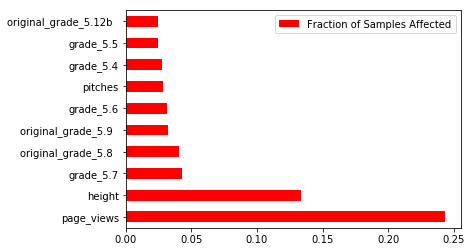

In [129]:
feat_scores_lim = feat_scores.sort_values(by='Fraction of Samples Affected', ascending=False).head(10)
feat_scores_lim.plot(kind='barh', color='red')

In [130]:
weights = dict(zip(X.columns, gb.feature_importances_))

### Compute Item sim

In [131]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [132]:
routes_df_clean = pd.concat(concat_list, axis=1).fillna(df_new.mean())
routes_df_clean.head()

,Aid,Alpine,Boulder,Ice,Mixed,Sport,TR,Trad,height,page_views,...,original_grade_5.6,original_grade_5.7,original_grade_5.7+,original_grade_5.8,original_grade_5.8+,original_grade_5.8-,original_grade_5.9,original_grade_5.9+,original_grade_5.9-,original_grade_Easy 5th
0,0,0,0,0,0,0,0,1,41.0,588,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,41.0,642,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,35.0,176,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,85.0,1263,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,30.0,678,...,1,0,0,0,0,0,0,0,0,0


In [133]:
items_mat = np.array(list(routes_df_clean.values)).astype(float)

In [134]:
cos_sim = 1-pairwise_distances(items_mat, metric="cosine")

In [135]:
n = 10

In [142]:
name = 'Godzilla'

In [143]:
route_names = list(df['name'])

In [144]:
index = route_names.index(name)

In [145]:
arr = cos_sim[index]

In [146]:
similar_routes = np.asarray(route_names)[arr.argsort()[-(n+1):][::-1][1:]]

In [147]:
similar_routes

array([u'Sagittarius', u'Pisces', u'The Tooth - South Face',
       u'Beckey Route (SW Face)', u'Slow Children',
       u'Breakfast of Champions', u'Princely Ambitions', u'Outer Space',
       u'Libra Crack', u'Rainy Day Woman'], 
      dtype='<U73')